In [27]:
%matplotlib inline 
from os import listdir
from os.path import isfile, join
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from matplotlib import pyplot as plt
import math
import gensim
import gensim.downloader
from gensim.models.fasttext import load_facebook_model
import warnings
warnings.filterwarnings('ignore')

In [153]:
ratings = pd.read_csv('../../data/uw_58_ratings_matrix.csv')
ratings= ratings.rename(columns={"Unnamed: 0": "concepts"})

In [3]:
##what word embedding models are available?
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [30]:
w2v_vecs = gensim.downloader.load('word2vec-google-news-300')
ft_vecs = gensim.downloader.load('fasttext-wiki-news-subwords-300')

In [31]:
# gensim.models.KeyedVectors.load_word2vec_format('/Users/kushin/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz', binary=True)

In [32]:
# gensim.models.fasttext.load_facebook_model('/Users/kushin/gensim-data/fasttext-wiki-news-subwords-300/fasttext-wiki-news-subwords-300.gz')


In [154]:
## Here's a 300 dim vector for a word

w2v_vecs['color']

array([-4.30297852e-03,  1.43554688e-01,  3.63769531e-02,  1.29882812e-01,
        1.27563477e-02, -1.92382812e-01,  3.06640625e-01, -2.49023438e-01,
        4.51660156e-02,  7.27539062e-02,  1.31835938e-01, -4.68750000e-02,
       -4.85839844e-02, -7.56835938e-02, -2.19726562e-03, -1.20117188e-01,
       -2.27539062e-01,  3.98437500e-01, -7.37304688e-02, -6.64062500e-01,
       -4.04296875e-01,  2.11181641e-02,  3.41796875e-02, -1.36718750e-01,
       -2.71484375e-01,  2.83203125e-02, -2.83203125e-01,  1.56250000e-01,
        1.20117188e-01, -6.83593750e-02, -4.04296875e-01,  2.14843750e-01,
       -4.15039062e-02,  1.24023438e-01, -9.03320312e-02,  5.49316406e-02,
        1.92871094e-02,  1.97753906e-02, -1.57226562e-01,  2.00195312e-02,
        1.52343750e-01, -3.61328125e-02,  1.26953125e-01, -1.36718750e-01,
        6.98242188e-02, -1.76757812e-01, -8.05664062e-02, -3.08593750e-01,
       -1.08398438e-01,  1.44531250e-01, -1.11816406e-01,  6.65283203e-03,
        1.14746094e-01, -

In [155]:
concept_list = ratings['concepts'].values
concept_list.shape

(30,)

In [156]:
#w2v_reps = np.hstack([concept_list.reshape(30,1),w2v_vecs[concept_list]] )
w2v_reps =w2v_vecs[concept_list]
w2v_reps

array([[ 0.00436401, -0.04345703, -0.08740234, ...,  0.02844238,
         0.10986328,  0.1640625 ],
       [ 0.02331543, -0.22851562,  0.06005859, ..., -0.12207031,
        -0.04956055,  0.36523438],
       [ 0.03149414,  0.01672363,  0.14941406, ..., -0.2109375 ,
        -0.13085938,  0.47265625],
       ...,
       [ 0.11962891,  0.08789062, -0.08496094, ..., -0.08496094,
         0.21582031,  0.11474609],
       [ 0.01574707,  0.07666016, -0.03222656, ..., -0.1171875 ,
         0.16894531, -0.05126953],
       [-0.18164062, -0.02612305, -0.20996094, ..., -0.1875    ,
         0.00680542, -0.01660156]], dtype=float32)

In [157]:

w2v_df = pd.concat([pd.DataFrame(concept_list.reshape(30,1), columns = {'concepts'}),pd.DataFrame(w2v_reps)], axis=1)


In [158]:
u, s, vt = np.linalg.svd(ratings.iloc[:,1:],full_matrices=False)

<BarContainer object of 30 artists>

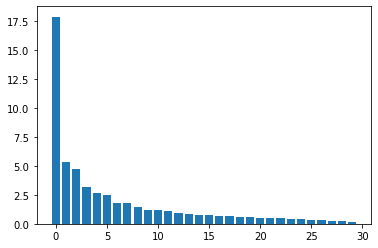

In [159]:
plt.bar(np.arange(len(s)),s)

In [160]:
s = np.diag(s)

In [161]:
#ratings = pd.concat([ratings, pd.DataFrame(u[:,:3]@s[:3,:3], columns = ['c1','c2','c3'])], axis=1)
ratings = pd.concat([ratings, pd.DataFrame(u[:,:3], columns = ['c1','c2','c3'])], axis=1)

Text(0.5, 0.92, 'color-concept association space')

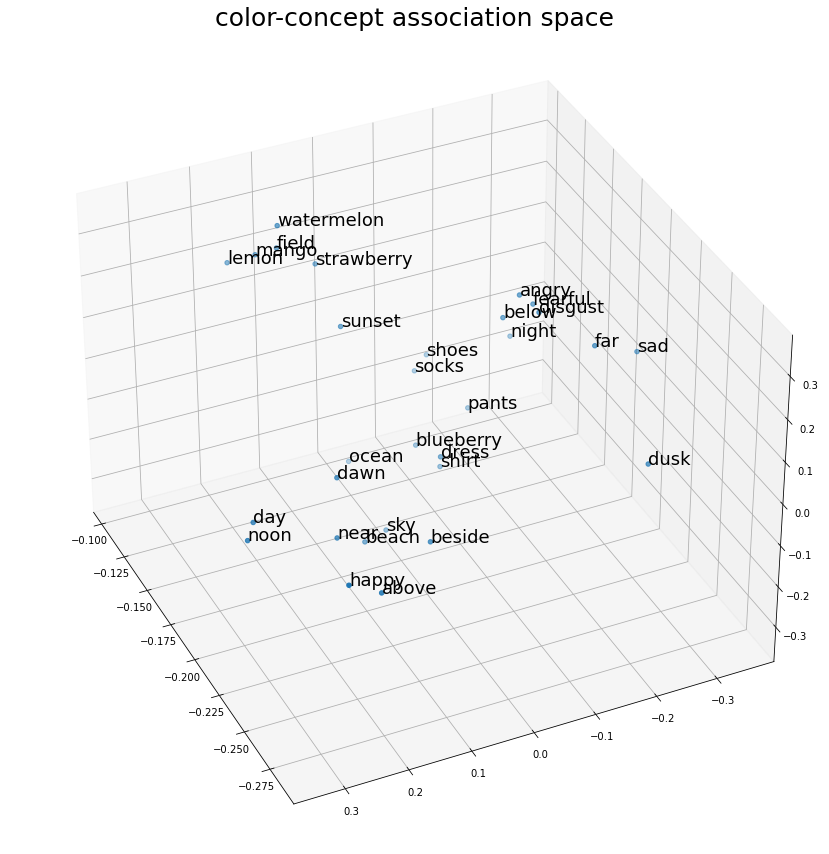

In [162]:
fig= plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
ax.view_init(35, 155)
#sns.scatterplot(x='c2',y='c3',hue='concepts',data=w2v_df,legend =False)

ax.scatter3D( ratings['c1'], ratings['c2'], ratings['c3'])
for i, txt in enumerate(ratings['concepts']):
    ax.text(ratings['c1'].iloc[i],ratings['c2'].iloc[i], ratings['c3'].iloc[i], txt, fontsize=18)
plt.title('color-concept association space', fontsize=25)

<BarContainer object of 30 artists>

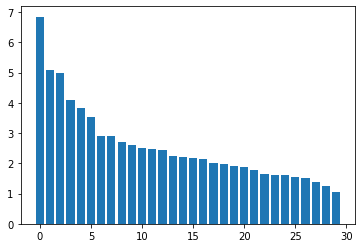

In [163]:
u_2, s_2, vt_2 = np.linalg.svd(w2v_df.iloc[:,1:],full_matrices=False)
plt.bar(np.arange(len(s_2)),s_2)

In [164]:
s_2 = np.diag(s_2)
#w2v_df = pd.concat([w2v_df, pd.DataFrame(u_2[:,:3]@s_2[:3,:3], columns = ['c1','c2','c3'])], axis=1)
w2v_df = pd.concat([w2v_df, pd.DataFrame(u_2[:,:3], columns = ['c1','c2','c3'])], axis=1)

Text(0.5, 0.92, 'word2vec space')

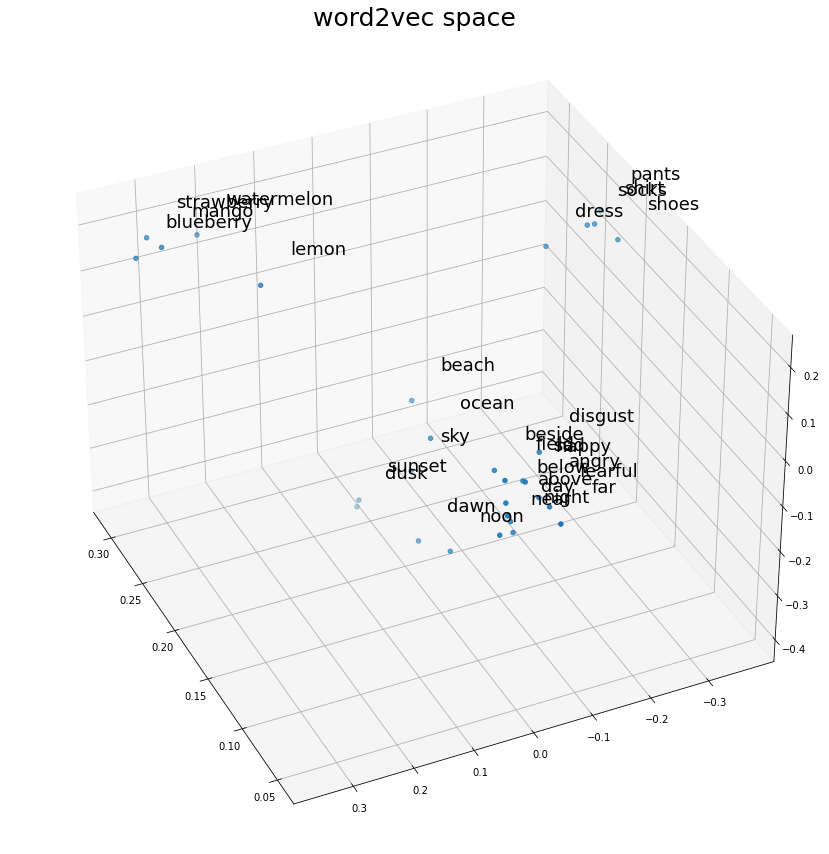

In [165]:
fig= plt.figure(figsize=(15,15))

ax = plt.axes(projection='3d')
ax.view_init(35, 155)
#sns.scatterplot(x='c2',y='c3',hue='concepts',data=w2v_df,legend =False)

ax.scatter3D( w2v_df['c1'], w2v_df['c2'], w2v_df['c3'])
for i, txt in enumerate(w2v_df['concepts']):
    ax.text(w2v_df['c1'].iloc[i],w2v_df['c2'].iloc[i]-0.05, w2v_df['c3'].iloc[i]+.05, txt, fontsize=18)
plt.title('word2vec space', fontsize=25)

In [166]:
w2v_df.iloc[:,1:301]

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.004364,-0.043457,-0.087402,0.227539,-0.020630,-0.002930,-0.060547,-0.332031,-0.158203,0.024902,...,-0.213867,0.035400,-0.103516,0.298828,0.046875,-0.102051,0.398438,0.028442,0.109863,0.164062
1,0.023315,-0.228516,0.060059,0.042969,-0.283203,-0.225586,-0.132812,-0.009460,0.210938,0.234375,...,-0.133789,0.168945,0.085938,0.320312,0.296875,-0.210938,0.243164,-0.122070,-0.049561,0.365234
2,0.031494,0.016724,0.149414,-0.008362,-0.180664,-0.052979,0.030518,-0.213867,0.306641,-0.069336,...,-0.170898,0.089355,-0.046631,0.101074,0.228516,-0.250000,0.039795,-0.210938,-0.130859,0.472656
3,-0.034912,-0.156250,-0.039795,0.145508,-0.243164,0.017944,-0.000961,-0.071777,-0.057617,0.314453,...,-0.277344,0.081055,-0.128906,0.033936,0.137695,-0.078613,0.265625,0.180664,-0.078613,0.164062
4,-0.196289,-0.116699,-0.119141,0.101074,-0.028687,0.002975,0.032227,-0.090820,-0.000553,0.152344,...,-0.152344,0.093262,-0.271484,0.010193,0.123535,-0.104980,0.059082,0.063477,0.012878,0.449219
5,-0.124023,-0.206055,-0.088867,0.265625,-0.024292,0.044678,0.101074,-0.034180,0.247070,0.105957,...,0.079590,-0.044434,-0.149414,0.023682,-0.090332,0.093750,0.137695,-0.026855,-0.060791,-0.123535
6,-0.179688,-0.412109,-0.057861,0.235352,-0.216797,0.109375,-0.120117,-0.125000,0.267578,0.010498,...,-0.057617,-0.186523,-0.189453,-0.012817,-0.145508,0.097656,0.048584,-0.081055,0.000309,-0.161133
7,0.132812,-0.148438,0.245117,0.257812,0.068848,-0.191406,0.047852,-0.202148,0.167969,0.355469,...,-0.001900,0.092285,-0.143555,-0.048584,-0.058105,0.022949,-0.073730,-0.116699,-0.240234,0.107910
8,-0.025391,-0.001587,-0.028320,0.054443,0.040771,-0.004089,0.069336,-0.085449,0.253906,0.133789,...,-0.373047,-0.096680,-0.073730,0.082031,0.064941,0.037842,0.215820,-0.185547,0.110352,-0.157227
9,0.092285,-0.201172,0.069336,0.168945,0.078125,-0.028076,-0.057373,-0.205078,0.126953,0.097656,...,-0.112305,0.026489,-0.119141,0.063477,0.045654,-0.096680,-0.194336,-0.008667,0.128906,-0.215820


In [167]:
reg_df = pd.concat([ratings,w2v_df.iloc[:,1:301]],axis=1)

In [178]:
reg_df.to_csv('../../data/reg_df.csv',index=False)

In [193]:
pred_coords = pd.read_csv('../../data/w2v_predicted_coords.csv')

Text(0.5, 0.92, 'Predicted coordinates')

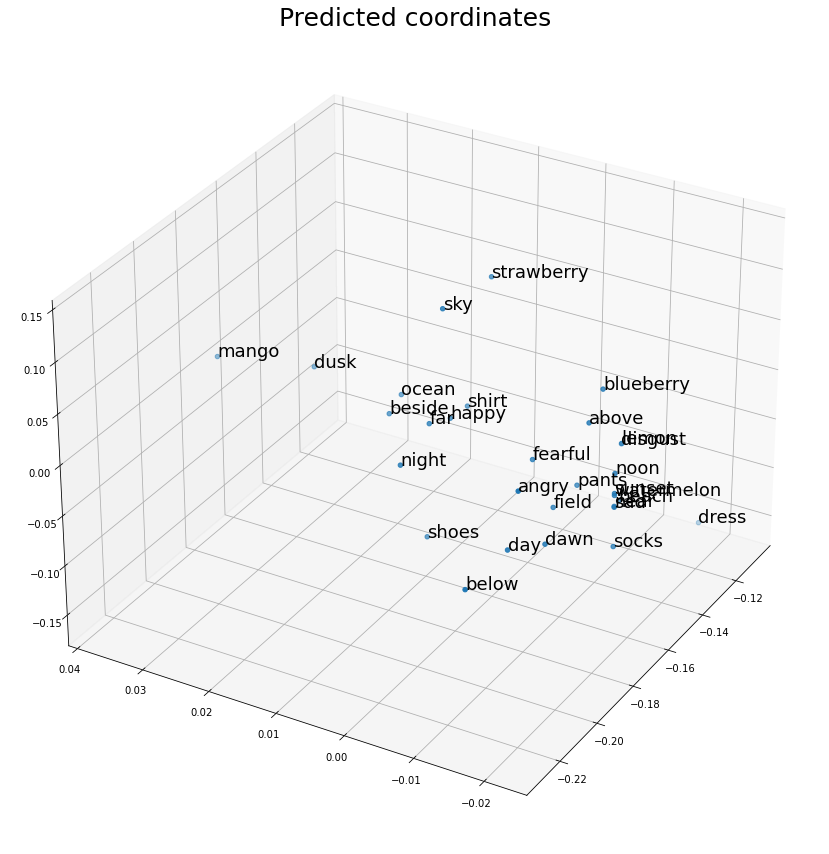

In [194]:
fig= plt.figure(figsize=(15,15))

ax = plt.axes(projection='3d')
ax.view_init(30, 210)
#sns.scatterplot(x='c2',y='c3',hue='concepts',data=w2v_df,legend =False)

ax.scatter3D( pred_coords['c1_pred'], pred_coords['c2_pred'], pred_coords['c3_pred'])
for i, txt in enumerate(pred_coords['concepts']):
    ax.text(pred_coords['c1_pred'].iloc[i],pred_coords['c2_pred'].iloc[i], pred_coords['c3_pred'].iloc[i], txt, fontsize=18)
plt.title('Predicted coordinates', fontsize=25)



In [192]:
pred_coords

,Unnamed: 0,concepts,c1_pred,c2_pred,c3_pred
0,1,dress,-0.136670,-0.017332,-0.115833
1,2,above,-0.172616,-0.017332,0.036046
2,3,angry,-0.192890,-0.017332,0.032135
3,4,blueberry,-0.173268,-0.017332,0.125540
4,5,beach,-0.161535,-0.017332,-0.067336
5,6,dawn,-0.188108,-0.017332,0.014438
6,7,pants,-0.179935,-0.014773,-0.021064
7,8,below,-0.179935,-0.014773,-0.021064
8,9,disgust,-0.179935,-0.014773,-0.021064
9,10,lemon,-0.179935,-0.014773,-0.021064


In [ ]:
w2v_vecs.similar_by_word("color")

In [ ]:
ft_vecs.similar_by_word("color")